In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from functools import reduce
import os
from subprocess import call
import sys
sys.path.append('../')
from package_global_functions import *

# same function as in plot_evos.py
def getTimeEvosPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/evo_to_stationary/time_evos_dif_cond'
    else:
        path = '/time_evos_dif_cond'
    return path

def get_avg_traj(dfs):
    df_avg = reduce(lambda a,b: a.add(b, fill_value=0), dfs)
    df_avg = df_avg/len(dfs)
    return df_avg

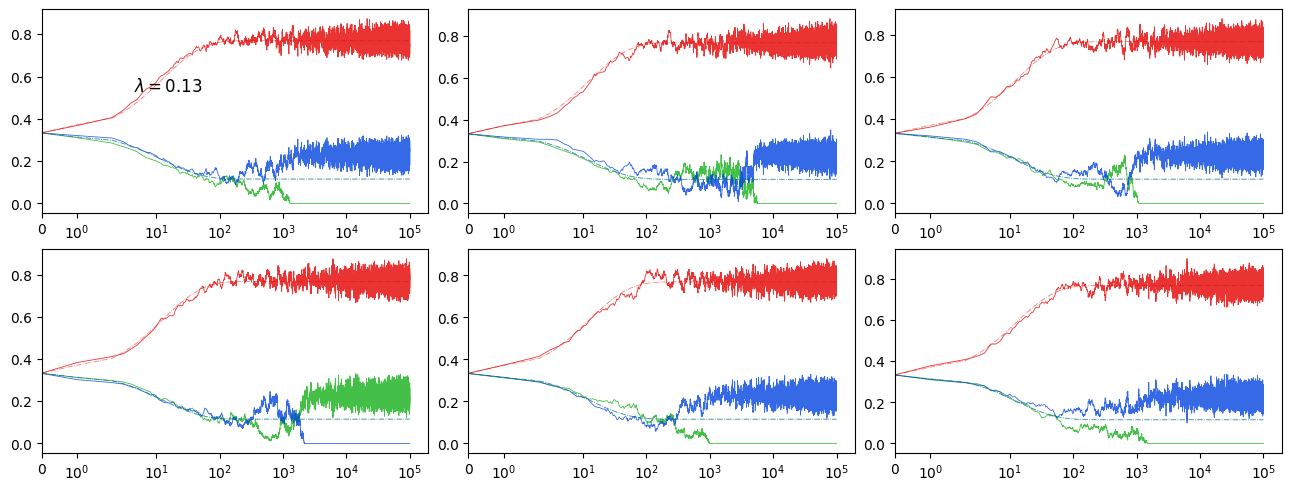

In [34]:
pi1, pi2, q1, q2, l, N, ic = 0.0, 0.0, 10.0, 10.0, 0.13, 1000, 'thirds'
# pi1, pi2, q1, q2, l, N, ic = 0.1, 0.1, 10.0, 10.0, 0.6, 1000, 'thirds'
# pi1, pi2, q1, q2, l, N, ic = 1e-6, 1e-6, 10.0, 10.0, 0.99, 1000, 'thirds'
if ic:
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_{ic}'
    dfint = pd.read_csv(f'{getTimeEvosPath()}/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_{ic}_Euler.csv')
else:
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
    dfint = pd.read_csv(f'{getTimeEvosPath()}/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_Euler.csv')
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
Nplots = 6
start = 6
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8), constrained_layout=True)
for i,df in enumerate(dfs[start:start+Nplots]):
    # simulation:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f0'], alpha=0.8, lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f1'], alpha=0.8, lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f2'], alpha=0.8, lw=0.6, color='xkcd:blue')
    # integration:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f0'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f1'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f2'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:blue')
    # details:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xlim(0,None)
fig.text(0.1, 0.82, f'$\lambda = {l}$', fontsize=12)
# fig.savefig(f'time_evos_pi_{pi1}_q_{q}_l_{l}_N_{N}_ic_{ic}.png')
fig.savefig(f'time_evos_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_N_{N}_ic_{ic}.png')

In [15]:
df['iter'].tail()

99996      99996
99997      99997
99998      99998
99999      99999
100000    100000
Name: iter, dtype: int64

### Letting q1<q2
<p> Let's go back to the case where there is a better site, q1 < q2. In this case, will the best site always win, whatever the initial conditions?</p>

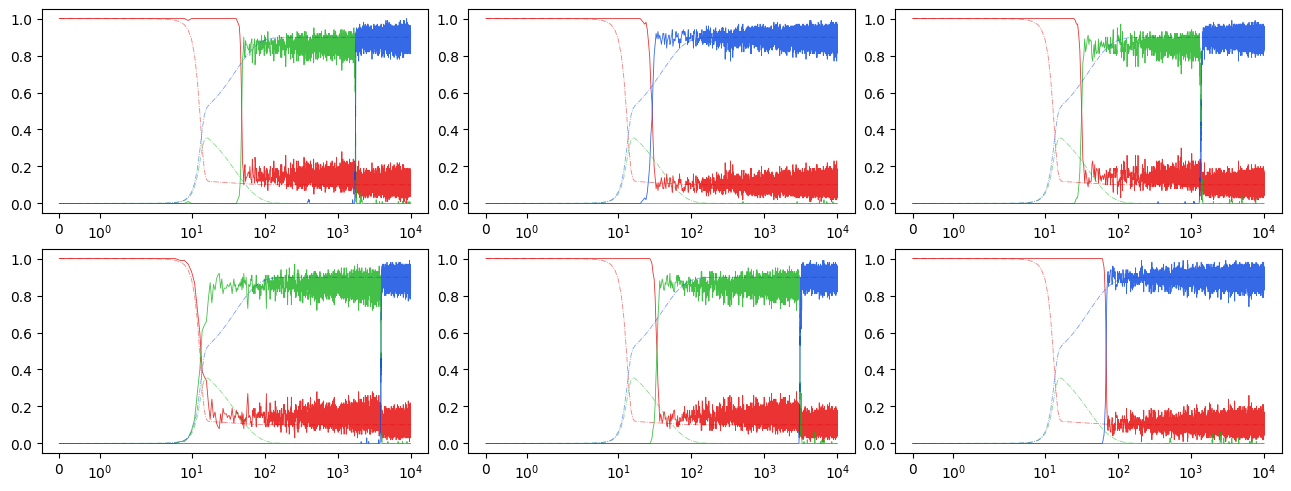

In [4]:
# pi1, pi2, q1, q2, l, N, ic = 0.0, 0.0, 9.9, 10.0, 0.05, 1000, '95f1' #'95f1'
pi1, pi2, q1, q2, l, N, ic = 0.01, 0.01, 7.0, 10.0, 0.99, 100, 'N' #'95f1'
if ic != 'N':
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_{ic}'
    dfint = pd.read_csv(f'{getTimeEvosPath()}/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_{ic}_Euler.csv')
else:
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
    dfint = pd.read_csv(f'{getTimeEvosPath()}/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_Euler.csv')
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
Nplots = 6
start = 12
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8), constrained_layout=True)
for i,df in enumerate(dfs[start:start+Nplots]):
     # simulation:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f0'], alpha=0.8, lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f1'], alpha=0.8, lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f2'], alpha=0.8, lw=0.6, color='xkcd:blue')
    # integration:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f0'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f1'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f2'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:blue')
    # details:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
    # ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xlim(0,5000)
# fig.savefig(f'time_evos_pi_{pi1}_q_{q}_l_{l}_N_{N}_ic_{ic}.png')
# fig.savefig(f'time_evos_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_N_{N}_ic_{ic}.png')

## Lambda 1

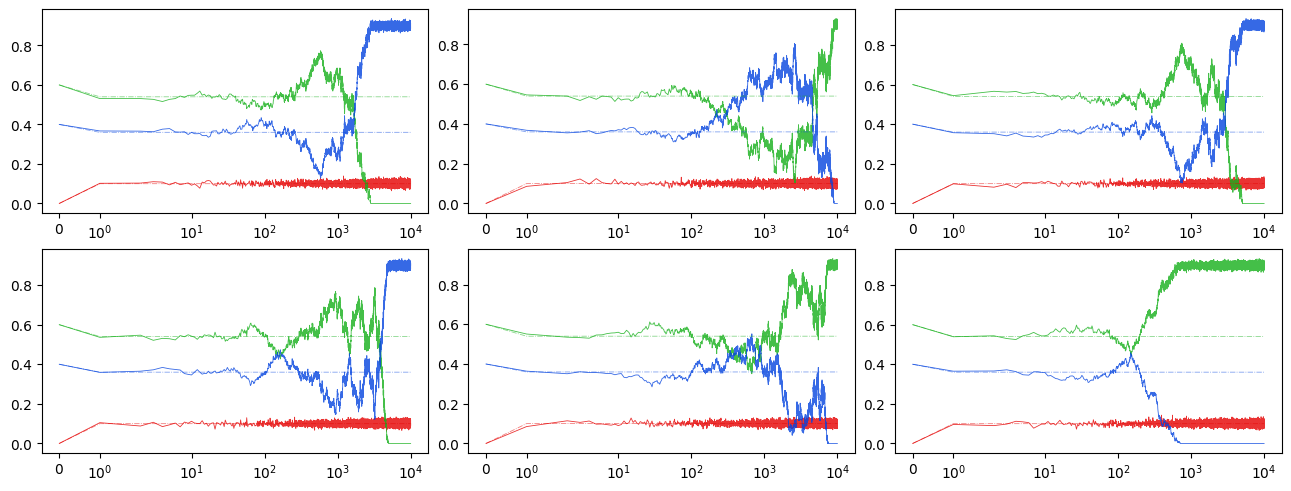

In [11]:
pi1, pi2, q1, q2, l, N, ic = 0.1, 0.1, 10.0, 10.0, 1.0, 1000, '60f1' #'95f1'
if ic:
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_{ic}'
    dfint = pd.read_csv(f'{getTimeEvosPath()}/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_{ic}_Euler.csv')
else:
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
    dfint = pd.read_csv(f'{getTimeEvosPath()}/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_Euler.csv')
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
Nplots = 6
start = 0
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8), constrained_layout=True)
for i,df in enumerate(dfs[start:start+Nplots]):
     # simulation:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f0'], alpha=0.8, lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f1'], alpha=0.8, lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f2'], alpha=0.8, lw=0.6, color='xkcd:blue')
    # integration:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f0'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f1'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f2'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:blue')
    # details:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
    # ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xlim(0,5000)
# fig.savefig(f'time_evos_pi_{pi1}_q_{q}_l_{l}_N_{N}_ic_{ic}.png')
fig.savefig(f'time_evos_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_N_{N}_ic_{ic}.png')

## pi 0 and lambda slightly above r

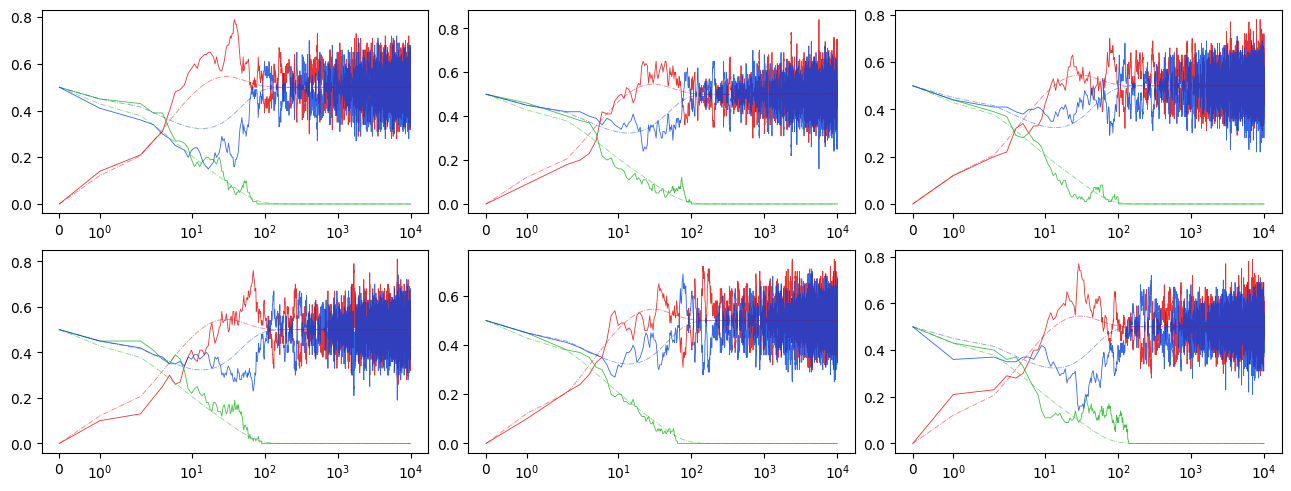

In [6]:
pi1, pi2, q1, q2, l, N, ic = 0.0, 0.0, 7.0, 10.0, 0.2, 100, 'H'
if ic:
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_{ic}'
    dfint = pd.read_csv(f'{getTimeEvosPath()}/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_{ic}_Euler.csv')
else:
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
    dfint = pd.read_csv(f'{getTimeEvosPath()}/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_Euler.csv')
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
Nplots = 6
start = 0
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8), constrained_layout=True)
for i,df in enumerate(dfs[start:start+Nplots]):
     # simulation:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f0'], alpha=0.8, lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f1'], alpha=0.8, lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f2'], alpha=0.8, lw=0.6, color='xkcd:blue')
    # integration:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f0'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f1'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(dfint['iter'], dfint['f2'], alpha=0.5, ls='-.', lw=0.6, color='xkcd:blue')
    # details:
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
    # ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xlim(0,5000)

## Fixing lambda and reducing pi

In [ ]:
pi1, pi2, q, l, N = 0.1, 0.1, 10, 0.6, 1000
# pi1, pi2, q, l, N = 0.3, 0.3, 10, 0.0, 100
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_{l}'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
Nplots = 6
fig, ax = plt.subplots(2, int(Nplots/2), figsize=(12.8, 4.8))
for i,df in enumerate(dfs[:Nplots]):
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f0'], alpha=0.8, lw=0.6, color='xkcd:red')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f1'], alpha=0.8, lw=0.6, color='xkcd:green')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].plot(df['iter'], df['f2'], alpha=0.8, lw=0.6, color='xkcd:blue')
    ax[int(i//(Nplots/2)),int(i%(Nplots/2))].set_xscale('symlog')
fig.text(0.15, 0.8, f'$\lambda = {l}, \pi_1 = \pi_2 = {pi1}$', fontsize=12)

## Many sizes on the same plot

In [ ]:
Ns = [1000, 10000, 100000]
Ns_colors = ['xkcd:red', 'xkcd:green', 'xkcd:blue']
# Ns = [1000, 100000]
# Ns_colors = ['xkcd:red', 'xkcd:blue']
pi1, pi2, q, l = 0.1, 0.1, 10, 0.9999
fig, ax = plt.subplots()
ax.set_xscale('symlog')
for N,Nc in zip(Ns,Ns_colors):
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_{l}'
    files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
    dfs = [pd.read_csv(file) for file in files]
    df_avg = get_avg_traj(dfs)
    i = 1
    df = dfs[i]
    df = df[(df.iter <= 100) | (df.iter % 20 == 0)]
    ax.plot(df.iter, df.f0, color=Nc, ls='--', marker='none', lw=0.7)
    ax.plot(df.iter, df.f1, color=Nc, ls=':', lw=0.7, marker='^', markersize=2)
    ax.plot(df.iter, df.f2, color=Nc, ls='-', marker='none', lw=0.7, label=f'{N}')
ax.legend()
# fig.text(0.15, 0.8, f'$\lambda = {l}, \pi_1 = \pi_2 = {pi1}$', fontsize=12)

## Measuring winner vs loser distance

In [ ]:
Ns = [1000, 10000, 100000]
fig, ax = plt.subplots(1,2, figsize=(8,4.8),tight_layout=True)

# increasing lambda
pi1, pi2, q1, q2,  = 0.1, 0.1, 10, 10
lambdas = [0.8, 0.9, 0.99, 0.999, 0.9999]
for N in Ns:
    dists_l = []
    for l in lambdas:
        folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
        if not os.path.exists(f'{getTimeEvosPath()}/{folder}/'):
            call(f'python evo_to_stationary.py {pi1} {pi2} {q1} {q2} {l} {N} N {np.random.randint(0,1000000)}', shell=True)
        files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
        dfs = [pd.read_csv(file) for file in files]
        dists = []
        for df in dfs:
            # f1avg, f2avg = np.average(df.f1[1000:]), np.average(df.f2[1000:])
            # dists.append(abs(f1avg-f2avg))
            df['dist'] = abs(df['f1'] - df['f2'])
            dists.append(np.average(df.dist[500:]))
        dists_l.append(np.average(dists))
    ax[0].plot([1-l for l in lambdas], dists_l, marker='.', lw=0.7, label=f'{N}')
ax[0].text(0.55, 0.55, f'$\pi_{{1,2}} = {pi1}, q_{{1,2}} = {q1}$', fontsize=9, transform=ax[0].transAxes)


# decreasing pi
q1, q2, l = 10, 10, 0.6
pis = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
for N in Ns:
    dists_pi = []
    for p in pis:
        pi1, pi2 = p, p
        folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
        if not os.path.exists(f'{getTimeEvosPath()}/{folder}/'):
            call(f'python evo_to_stationary.py {pi1} {pi2} {q1} {q2} {l} {N} N {np.random.randint(0,1000000)}', shell=True)
        files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
        dfs = [pd.read_csv(file) for file in files]
        dists = []
        for df in dfs:
            # f1avg, f2avg = np.average(df.f1[1000:]), np.average(df.f2[1000:])
            # dists.append(abs(f1avg-f2avg))
            df['dist'] = abs(df['f1'] - df['f2'])
            dists.append(np.average(df.dist[500:]))
        if N == 100000 and p == 0.001:
            print(dists)
        dists_pi.append(np.average(dists))
    ax[1].plot(pis, dists_pi, marker='.', lw=0.7, label=f'{N}')
ax[1].legend()
ax[1].text(0.55, 0.55, f'$\lambda = {l}, q_{{1,2}} = {q1}$', fontsize=9, transform=ax[1].transAxes)


# ax[0].plot([1-l for l in lambdas], dists_l, marker='.', lw=0.7)
ax[0].set(xlabel='$1 - \lambda$', ylabel='$f_{win} - f_{lose}$', xscale='log')
# ax[0].plot(lambdas, dists_l, marker='.', lw=0.7)
# ax[0].set(xlabel='$\lambda$', ylabel='$f_{win} - f_{lose}$', xscale='log')
# ax[1].plot(pis, dists_pi, marker='.', lw=0.7)
ax[1].set(xlabel='$\pi_{1,2}$', xscale='log')
fig.savefig(f'fwin_flose_dif_l_and_pi_qs_{q1}.png')

## Simulations at pi=0.0

### Let's only control f_0 and change lambda:

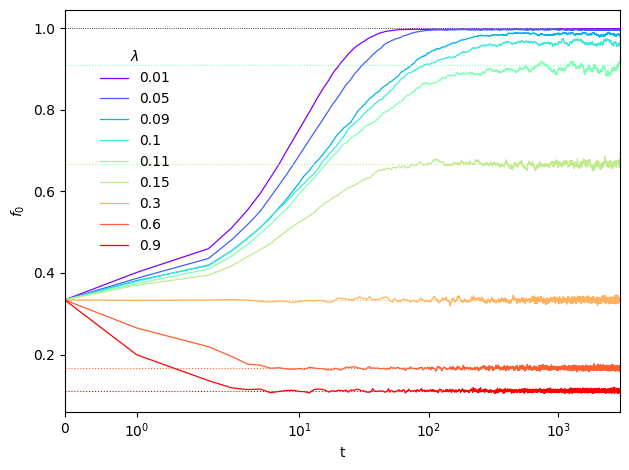

In [26]:
pi1, pi2, q, N = 0.0001, 0.0001, 10, 1000
if N == 1000:
    ls = [0.01, 0.05, 0.09, 0.1, 0.11, 0.15, 0.3, 0.6, 0.9]
else:
    ls = [0.01, 0.05, 0.09, 0.1, 0.15, 0.2, 0.3, 0.6, 0.9]
ls_colors = plt.cm.rainbow(np.linspace(0.0,1.0,len(ls)))
fig, ax = plt.subplots(tight_layout=True)
ax.axhline(1.0, 0, 1, ls=':', color='k', lw=0.6)
for l,lc in zip(ls, ls_colors):
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_{l}_ic_thirds'
    files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
    dfs = [pd.read_csv(file) for file in files]
    df_avg = get_avg_traj(dfs)
    ax.plot(df_avg['iter'], df_avg['f0'], lw=0.9, color=lc, label=f'{l}')
    if l > (1/q):
        ax.axhline((1/q)/l, 0, 1, ls=':', color=lc, lw=0.8)
ax.set(xlabel='t', ylabel='$f_0$', xscale='symlog', xlim=(0,3000))
fig.legend(loc=(0.15,0.45), frameon=False, title='$\lambda$')
fig.savefig(f'f0evo_pi_{pi1}_eqq_q_{q}_N_{N}.png')

[Text(0.5, 0, '$\\lambda$'), Text(0, 0.5, 'avg $|f_0^{teo} - f_0^{sim}|$')]

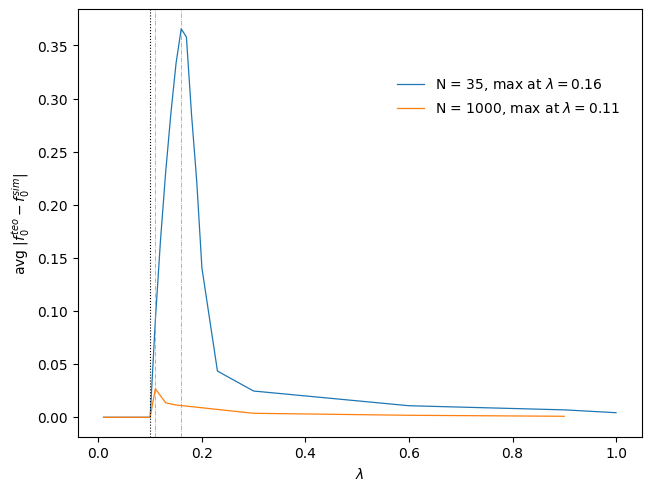

In [80]:
# Distance to the theoretically expecte value
# using the last 100(?) time steps of each simulation
pi1, pi2, q = 0.0, 0.0, 10

fig, ax = plt.subplots(constrained_layout=True)

for N in [35, 1000]:
    files = glob.glob(f'{getTimeEvosPath()}/time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_*_ic_thirds')
    ls = sorted([float(file.split('/')[-1].split('_')[14]) for file in files])
    errors_N = []
    for l in ls:
        folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_{l}_ic_thirds'
        files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
        dfs = [pd.read_csv(file) for file in files]
        avgs_f0 = [np.average(df['f0'].iloc[-100:]) for df in dfs]
        if l > (1/q):
            f0teo = (1/q)/l
        elif l <= (1/q):
            f0teo = 1.0
        error = np.average([abs(f0teo-f0avg) for f0avg in avgs_f0])
        errors_N.append(error)
    index_max = max(range(len(errors_N)), key=errors_N.__getitem__)
    ax.axvline(ls[index_max], 0,1, ls='-.', lw=0.5, color='xkcd:gray')
    ax.plot(ls, errors_N, lw=0.9, label=f'N = {N}, max at $\lambda = {ls[index_max]}$')

ax.axvline(1/q, 0, 1, ls=':', color='k', lw=0.8)
fig.legend(loc=(0.6, 0.75), frameon=False)
ax.set(xlabel='$\lambda$', ylabel='avg $|f_0^{teo} - f_0^{sim}|$')

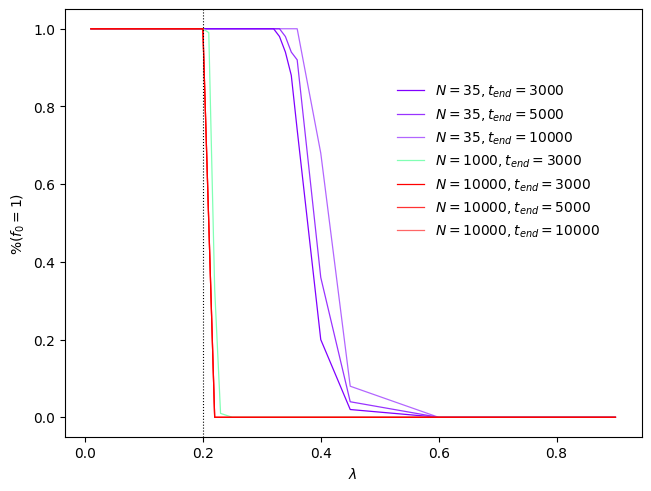

In [21]:
# Number of simulations ending at f0=1
# Ideally this would fall sharply when l>r
pi1, pi2, q = 0.0, 0.0, 5

fig, ax = plt.subplots(constrained_layout=True)

lastIters = 10

# N_times = {35: [3000, 5000, 10000], 1000:[3000,], 10000:[3000,]} # q 10
N_times = {35: [3000, 5000, 10000], 1000:[3000,], 10000:[3000, 5000, 10000]} # q 5
N_colors = plt.cm.rainbow(np.linspace(0.0, 1.0, len(N_times.keys())))

for (N,times),cN in zip(N_times.items(),N_colors):
    files = glob.glob(f'{getTimeEvosPath()}/time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_*_ic_thirds')
    ls = sorted([float(file.split('/')[-1].split('_')[14]) for file in files])
    for i,endtime in enumerate(times):
        percs = []
        for l in ls:
            folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_{l}_ic_thirds'
            files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
            dfs = [pd.read_csv(file) for file in files]
            counter = 0
            for df in dfs:
                if abs(np.average(df['f0'].iloc[endtime-lastIters+2:endtime+2])-1.0) == 0.0 or abs(np.average(df['f0'].iloc[endtime-lastIters+2:endtime+2])-1.0) <= 1e-8:
                    counter += 1
            percs.append(counter/len(dfs))
        ax.plot(ls, percs, lw=0.9, color=cN, alpha=1.0-i*0.2, label=f'$N = {N}, t_{{end}} = {endtime}$')

ax.axvline((1/q), 0, 1, ls=':', color='k', lw=0.8)
fig.legend(loc=(0.6, 0.5), frameon=False)
ax.set(xlabel='$\lambda$', ylabel='$ \% (f_0 = 1)$')

fig.savefig(f'perc_sims_ending_f0_eq_1_pi_{pi1}_q_{q}.png')


In [20]:
pi1 = pi2 = 0.0
q = 5
files = glob.glob(f'{getTimeEvosPath()}/time_evo_csv_N_35_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_*_ic_thirds')
ls = sorted([float(file.split('/')[-1].split('_')[14]) for file in files])
print(ls)

[0.01, 0.05, 0.1, 0.15, 0.18, 0.2, 0.22, 0.25, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.4, 0.45, 0.6, 0.9]


In [18]:
pi1, pi2, q = 0.0, 0.0, 5
for N in [1000, ]:
    files = glob.glob(f'{getTimeEvosPath()}/time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_*_ic_thirds')
    ls = sorted([float(file.split('/')[-1].split('_')[14]) for file in files])
    for l in ls:
        folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q}_q2_{q}_l_{l}_ic_thirds'
        files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
        dfs = [pd.read_csv(file) for file in files]
        print(len(dfs[0]['iter']))

3001
3001
3001
3001
3001
3001
3001
3001
3001
3001
3001
3001
3001
3001
3001


## Kilobots

Averages over realizations:
0.2119 0.3329 0.4553


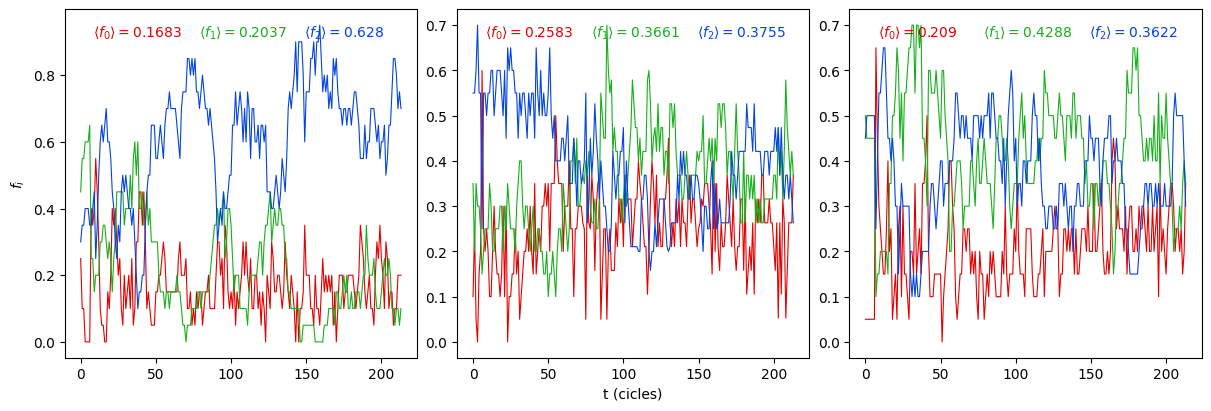

In [4]:
folder = 'results_kb/'
files = glob.glob(f'{folder}*')
pi, q, l = 0.3, 7, 0.6
avgfrom = 25

fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
global_avgs = [0.0, 0.0, 0.0]
for i in range(3):
    df = pd.read_csv(files[i])
    df['sum'] = df['R']+df['G']+df['B']
    time = list(range(len(df)))
    df['f0'] =  df['R']/df['sum']
    df['f1'] =  df['G']/df['sum']
    df['f2'] =  df['B']/df['sum']
    ax[i].plot(time, df['f0'], color='xkcd:red', lw=0.8)
    ax[i].plot(time, df['f1'], color='xkcd:green', lw=0.8)
    ax[i].plot(time, df['f2'], color='xkcd:blue', lw=0.8)
    avgf0, avgf1, avgf2 = np.average(df['f0'].iloc[avgfrom:]), np.average(df['f1'].iloc[avgfrom:]), np.average(df['f2'].iloc[avgfrom:])
    for j,avgfj in enumerate([avgf0, avgf1, avgf2]):
        global_avgs[j] += avgfj
    ax[i].text(0.08, 0.92, fr'$\langle f_0 \rangle = {round(avgf0,4)}$', transform=ax[i].transAxes, color='xkcd:red')
    ax[i].text(0.38, 0.92, fr'$\langle f_1 \rangle = {round(avgf1,4)}$', transform=ax[i].transAxes, color='xkcd:green')
    ax[i].text(0.68, 0.92, fr'$\langle f_2 \rangle = {round(avgf2,4)}$', transform=ax[i].transAxes, color='xkcd:blue')
ax[1].set_xlabel('t (cicles)')
ax[0].set_ylabel('$f_i$')
print('Averages over realizations:')
global_avgs = [avgfj/3 for avgfj in global_avgs]
print(f'{round(global_avgs[0],4)} {round(global_avgs[1],4)} {round(global_avgs[2],4)}')
fig.savefig(f'kbs_eqq_eqpi_q_{q}_pi_{pi}_l_{l}.png')